In [1]:
# Cell 1: Import Libraries
# ==============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visual styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
# Cell 2: Load the Data
# ==============================================

data_path = "../data/raw/data.csv"  
try:
    df = pd.read_csv(data_path)
    print("✅ Data loaded successfully!")
    print(f"📊 Data shape: {df.shape}")
    print(f"📋 Columns: {list(df.columns)}")
except FileNotFoundError:
    print("❌ File not found! Please check the path.")
    print("Current path being checked:", data_path)
    

✅ Data loaded successfully!
📊 Data shape: (95662, 16)
📋 Columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']


In [4]:
# Cell 3: Initial Data Overview
# ==============================================
print("="*50)
print("FIRST GLANCE AT THE DATA")
print("="*50)

# Display first few rows
print("\n📄 First 5 rows:")
display(df.head())

# Display last few rows
print("\n📄 Last 5 rows:")
display(df.tail())

# Basic info
print("\n📋 Data Info:")
df.info()

# Check for duplicates
print(f"\n🔍 Duplicate rows: {df.duplicated().sum()}")
print(f"🔍 Duplicate Transaction IDs: {df['TransactionId'].duplicated().sum()}")

FIRST GLANCE AT THE DATA

📄 First 5 rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



📄 Last 5 rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0



📋 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  Fraud

In [5]:
# Cell 4: Summary Statistics
# ==============================================
print("="*50)
print("SUMMARY STATISTICS")
print("="*50)

# Numerical columns
print("\n🧮 Numerical Columns Summary:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
display(df[numerical_cols].describe().T)

# Categorical columns  
print("\n🏷️ Categorical Columns Summary:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Top 5 values:")
    display(df[col].value_counts().head())

SUMMARY STATISTICS

🧮 Numerical Columns Summary:


,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0



🏷️ Categorical Columns Summary:

TransactionId:
  Unique values: 95662
  Top 5 values:


TransactionId
TransactionId_76871    1
TransactionId_73770    1
TransactionId_26203    1
TransactionId_380      1
TransactionId_28195    1
Name: count, dtype: int64


BatchId:
  Unique values: 94809
  Top 5 values:


BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
Name: count, dtype: int64


AccountId:
  Unique values: 3633
  Top 5 values:


AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
Name: count, dtype: int64


SubscriptionId:
  Unique values: 3627
  Top 5 values:


SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
Name: count, dtype: int64


CustomerId:
  Unique values: 3742
  Top 5 values:


CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
Name: count, dtype: int64


CurrencyCode:
  Unique values: 1
  Top 5 values:


CurrencyCode
UGX    95662
Name: count, dtype: int64


ProviderId:
  Unique values: 6
  Top 5 values:


ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
Name: count, dtype: int64


ProductId:
  Unique values: 23
  Top 5 values:


ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
Name: count, dtype: int64


ProductCategory:
  Unique values: 9
  Top 5 values:


ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
Name: count, dtype: int64


ChannelId:
  Unique values: 4
  Top 5 values:


ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


TransactionStartTime:
  Unique values: 94556
  Top 5 values:


TransactionStartTime
2018-12-24T16:30:13Z    17
2018-11-15T07:03:26Z     9
2018-12-07T13:09:44Z     6
2018-12-24T16:30:12Z     6
2018-11-15T07:03:27Z     5
Name: count, dtype: int64

In [6]:
# Cell 5: Missing Values Analysis
# ==============================================
print("="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)

# Calculate missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percent
}).sort_values('Percentage', ascending=False)

print("\n📊 Missing Values Summary:")
display(missing_df[missing_df['Missing Values'] > 0])

# Visualize missing values
if missing_df['Missing Values'].sum() > 0:
    print("\n📈 Missing Values Matrix:")
    plt.figure(figsize=(12, 6))
    msno.matrix(df, fontsize=10)
    plt.title('Missing Values Matrix', fontsize=14, pad=20)
    plt.show()
    
    print("\n📈 Missing Values Bar Chart:")
    plt.figure(figsize=(12, 6))
    missing_plot_df = missing_df[missing_df['Percentage'] > 0]
    bars = plt.bar(missing_plot_df.index, missing_plot_df['Percentage'])
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Percentage Missing (%)', fontsize=12)
    plt.title('Missing Values by Column', fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
else:
    print("🎉 No missing values found!")

MISSING VALUES ANALYSIS

📊 Missing Values Summary:


,Missing Values,Percentage


🎉 No missing values found!


NUMERICAL FEATURES DISTRIBUTION

📊 Analysis of: Amount


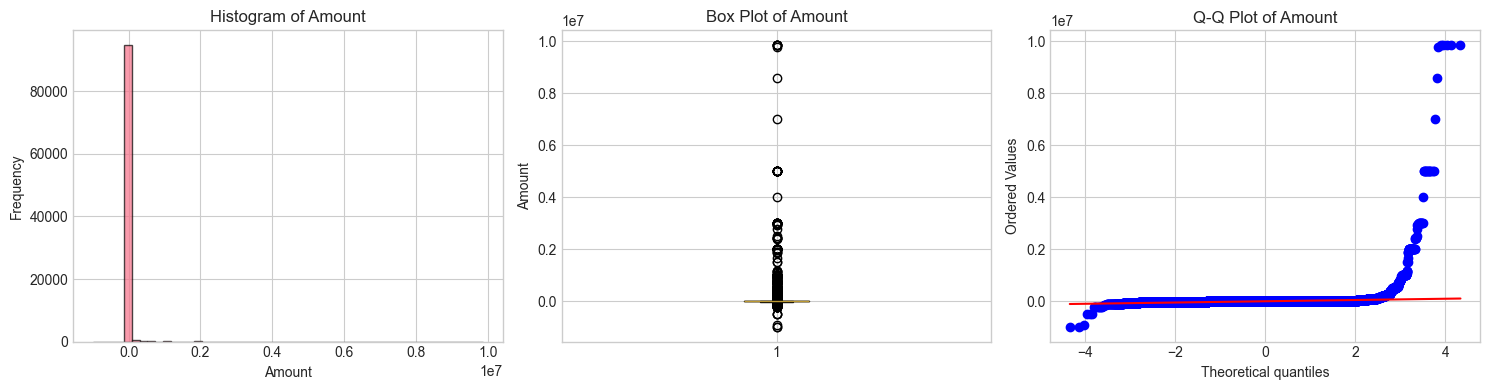

  Mean: 6717.85
  Median: 1000.00
  Std Dev: 123306.80
  Skewness: 51.10
  Kurtosis: 3363.13
  Range: [-1000000.00, 9880000.00]

📊 Analysis of: Value


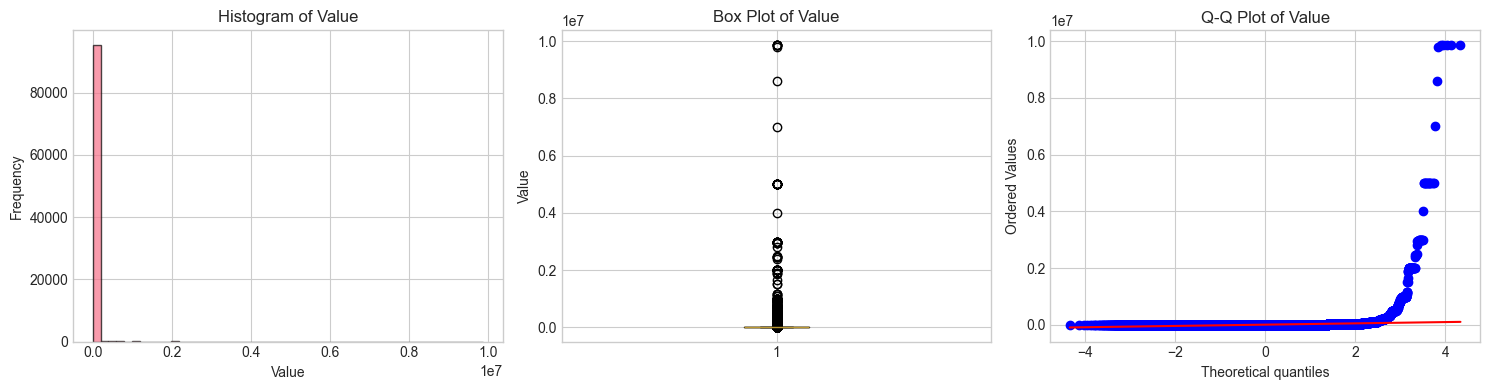

  Mean: 9900.58
  Median: 1000.00
  Std Dev: 123122.09
  Skewness: 51.29
  Kurtosis: 3378.07
  Range: [2.00, 9880000.00]


In [7]:
# Cell 6: Distribution of Numerical Features
# ==============================================
print("="*50)
print("NUMERICAL FEATURES DISTRIBUTION")
print("="*50)

# Select key numerical columns (adjust based on your data)
key_numerical = ['Amount', 'Value']  # Add more as needed

for col in key_numerical:
    if col in df.columns:
        print(f"\n📊 Analysis of: {col}")
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))
        
        # Histogram
        axes[0].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
        axes[0].set_title(f'Histogram of {col}', fontsize=12)
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')
        
        # Box plot
        axes[1].boxplot(df[col].dropna())
        axes[1].set_title(f'Box Plot of {col}', fontsize=12)
        axes[1].set_ylabel(col)
        
        # Q-Q plot (check normality)
        stats.probplot(df[col].dropna(), dist="norm", plot=axes[2])
        axes[2].set_title(f'Q-Q Plot of {col}', fontsize=12)
        
        plt.tight_layout()
        plt.show()
        
        # Statistics
        print(f"  Mean: {df[col].mean():.2f}")
        print(f"  Median: {df[col].median():.2f}")
        print(f"  Std Dev: {df[col].std():.2f}")
        print(f"  Skewness: {df[col].skew():.2f}")
        print(f"  Kurtosis: {df[col].kurtosis():.2f}")
        print(f"  Range: [{df[col].min():.2f}, {df[col].max():.2f}]")

CORRELATION ANALYSIS

🔥 Correlation Matrix:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


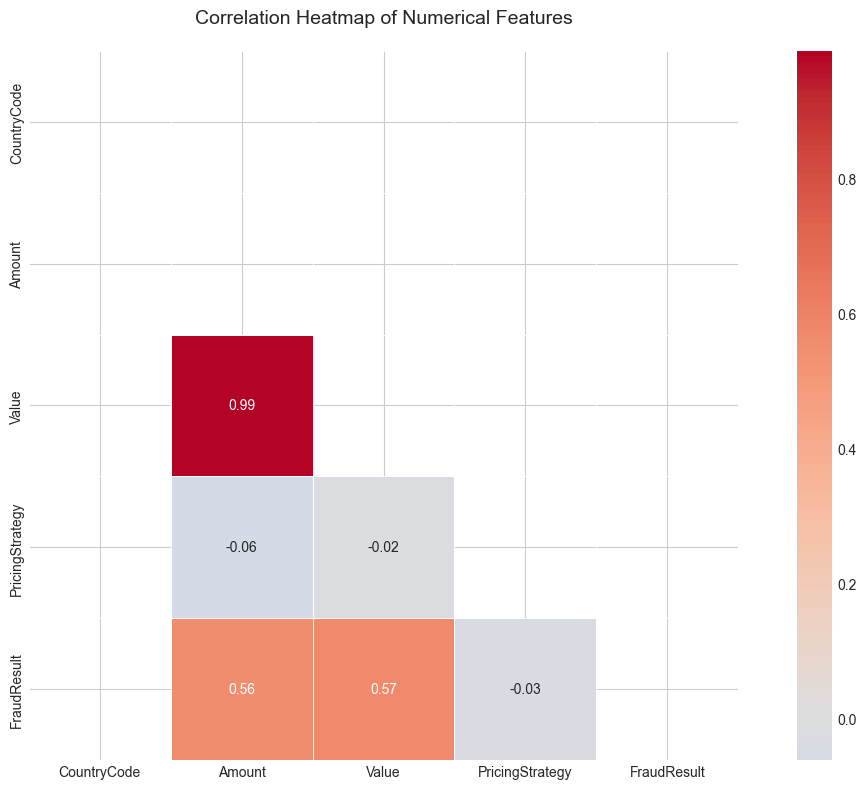


🔍 Strong Correlations (|r| > 0.7):
  Amount ↔ Value: 0.990


In [8]:
# Cell 8: Correlation Analysis
# ==============================================
print("="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Select numerical columns for correlation
corr_cols = df.select_dtypes(include=[np.number]).columns

if len(corr_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = df[corr_cols].corr()
    
    print("\n🔥 Correlation Matrix:")
    display(correlation_matrix)
    
    # Visualize correlation heatmap
    plt.figure(figsize=(12, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
                cmap='coolwarm', center=0, square=True, linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Features', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Find strong correlations (absolute value > 0.7)
    print("\n🔍 Strong Correlations (|r| > 0.7):")
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                strong_corr.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    correlation_matrix.iloc[i, j]
                ))
    
    if strong_corr:
        for pair in strong_corr:
            print(f"  {pair[0]} ↔ {pair[1]}: {pair[2]:.3f}")
    else:
        print("  No strong correlations found.")
else:
    print("⚠️ Not enough numerical columns for correlation analysis")

TIME-BASED ANALYSIS


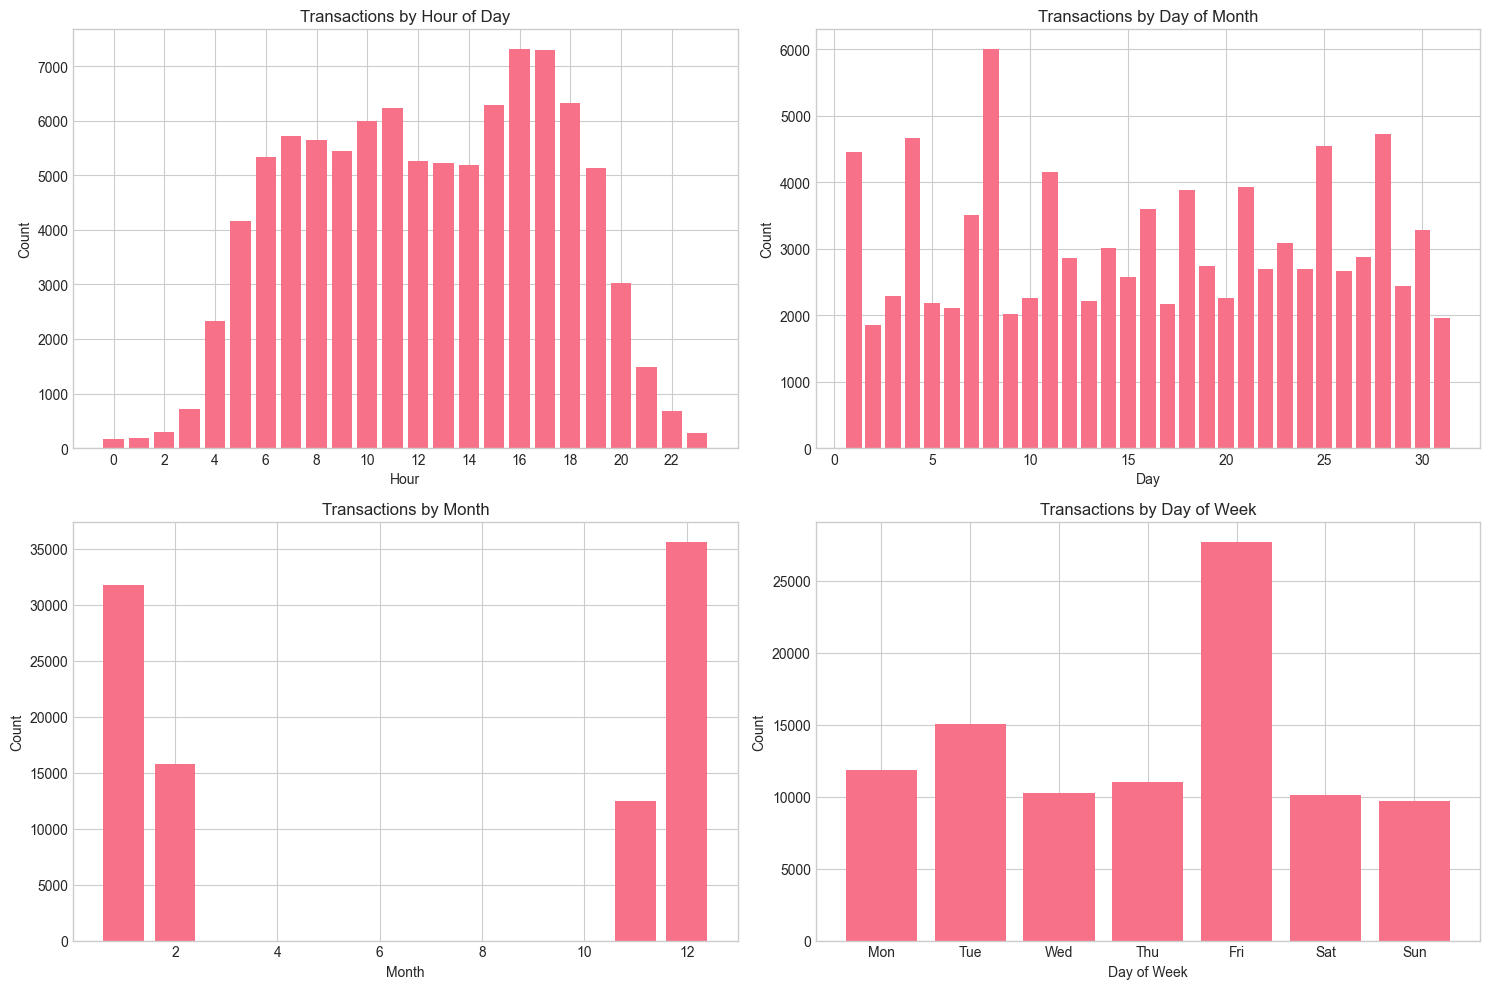


📅 Time Analysis Summary:
  Date range: 2018-11-15 02:18:49+00:00 to 2019-02-13 10:01:28+00:00
  Total days: 90
  Peak hour: 16:00 (7306 transactions)


In [9]:
# Cell 9: Time-Based Analysis (if TransactionStartTime exists)
# ==============================================
print("="*50)
print("TIME-BASED ANALYSIS")
print("="*50)

if 'TransactionStartTime' in df.columns:
    # Convert to datetime
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    
    # Extract time features
    df['TransactionHour'] = df['TransactionStartTime'].dt.hour
    df['TransactionDay'] = df['TransactionStartTime'].dt.day
    df['TransactionMonth'] = df['TransactionStartTime'].dt.month
    df['TransactionDayOfWeek'] = df['TransactionStartTime'].dt.dayofweek
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Hourly distribution
    hourly_counts = df['TransactionHour'].value_counts().sort_index()
    axes[0, 0].bar(hourly_counts.index, hourly_counts.values)
    axes[0, 0].set_title('Transactions by Hour of Day', fontsize=12)
    axes[0, 0].set_xlabel('Hour')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].set_xticks(range(0, 24, 2))
    
    # Daily distribution
    daily_counts = df['TransactionDay'].value_counts().sort_index()
    axes[0, 1].bar(daily_counts.index, daily_counts.values)
    axes[0, 1].set_title('Transactions by Day of Month', fontsize=12)
    axes[0, 1].set_xlabel('Day')
    axes[0, 1].set_ylabel('Count')
    
    # Monthly distribution
    monthly_counts = df['TransactionMonth'].value_counts().sort_index()
    axes[1, 0].bar(monthly_counts.index, monthly_counts.values)
    axes[1, 0].set_title('Transactions by Month', fontsize=12)
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Count')
    
    # Day of week distribution
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    dow_counts = df['TransactionDayOfWeek'].value_counts().sort_index()
    axes[1, 1].bar(day_names, dow_counts.values)
    axes[1, 1].set_title('Transactions by Day of Week', fontsize=12)
    axes[1, 1].set_xlabel('Day of Week')
    axes[1, 1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    print("\n📅 Time Analysis Summary:")
    print(f"  Date range: {df['TransactionStartTime'].min()} to {df['TransactionStartTime'].max()}")
    print(f"  Total days: {(df['TransactionStartTime'].max() - df['TransactionStartTime'].min()).days}")
    print(f"  Peak hour: {hourly_counts.idxmax()}:00 ({hourly_counts.max()} transactions)")
    
else:
    print("⚠️ 'TransactionStartTime' column not found for time analysis")

FRAUD ANALYSIS

🔒 Fraud Cases: 193
🔒 Non-Fraud Cases: 95469
🔒 Fraud Rate: 0.20%


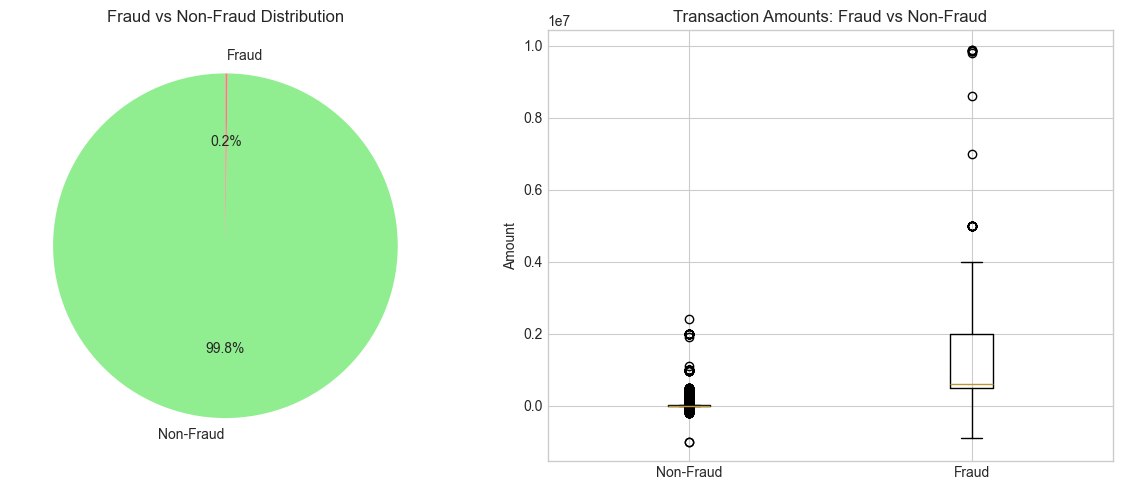


🔍 Fraud by Product Category:


ProductCategory
financial_services    161
airtime                18
utility_bill           12
transport               2
Name: count, dtype: int64

In [10]:
# Cell 10: Fraud Analysis (if FraudResult exists)
# ==============================================
print("="*50)
print("FRAUD ANALYSIS")
print("="*50)

if 'FraudResult' in df.columns:
    fraud_counts = df['FraudResult'].value_counts()
    fraud_percentage = (fraud_counts / len(df)) * 100
    
    print(f"\n🔒 Fraud Cases: {fraud_counts.get(1, 0)}")
    print(f"🔒 Non-Fraud Cases: {fraud_counts.get(0, 0)}")
    print(f"🔒 Fraud Rate: {fraud_percentage.get(1, 0):.2f}%")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Pie chart
    axes[0].pie(fraud_counts.values, labels=['Non-Fraud', 'Fraud'], 
                autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
    axes[0].set_title('Fraud vs Non-Fraud Distribution', fontsize=12)
    
    # Compare amounts
    if 'Amount' in df.columns:
        fraud_amounts = df[df['FraudResult'] == 1]['Amount']
        non_fraud_amounts = df[df['FraudResult'] == 0]['Amount']
        
        axes[1].boxplot([non_fraud_amounts, fraud_amounts], labels=['Non-Fraud', 'Fraud'])
        axes[1].set_title('Transaction Amounts: Fraud vs Non-Fraud', fontsize=12)
        axes[1].set_ylabel('Amount')
    
    plt.tight_layout()
    plt.show()
    
    # Fraud by category
    if 'ProductCategory' in df.columns:
        print("\n🔍 Fraud by Product Category:")
        fraud_by_category = df[df['FraudResult'] == 1]['ProductCategory'].value_counts().head(10)
        display(fraud_by_category)
else:
    print("⚠️ 'FraudResult' column not found for fraud analysis")

CUSTOMER-LEVEL ANALYSIS

👥 Total unique customers: 3742
💰 Total transactions analyzed: 95662

📊 Customer Behavior Summary:
       TransactionCount   TotalAmount   AvgAmount   StdAmount
count           3742.00  3.742000e+03     3742.00     3030.00
mean              25.56  1.717377e+05    15715.62    16802.16
std               96.93  2.717305e+06   167699.10   107431.08
min                1.00 -1.049000e+08  -425000.00        0.00
25%                2.00  4.077440e+03     1000.00     1533.58
50%                7.00  2.000000e+04     2583.85     5389.78
75%               20.00  7.996775e+04     4877.61     7549.05
max             4091.00  8.345124e+07  8601821.14  3309916.12

🏆 Top 5 Customers by Number of Transactions:


,TransactionCount,TotalAmount,AvgAmount,StdAmount
CustomerId,,,,
CustomerId_7343,4091,-104900000.0,-25641.65,12952.60
CustomerId_3634,2085,2628793.0,1260.81,5388.21
CustomerId_647,1869,3633564.0,1944.12,7715.39
CustomerId_1096,784,1949226.0,2486.26,17819.37
CustomerId_4033,778,1768355.5,2272.95,10382.69



🏆 Top 5 Customers by Total Amount Spent:


,TransactionCount,TotalAmount,AvgAmount,StdAmount
CustomerId,,,,
CustomerId_909,115,83451240.0,725662.96,1297279.33
CustomerId_1535,7,60212748.0,8601821.14,3309916.12
CustomerId_4878,205,50804960.0,247829.07,481438.10
CustomerId_5155,121,29726020.0,245669.59,575981.09
CustomerId_4453,54,29294460.0,542490.00,1108161.71


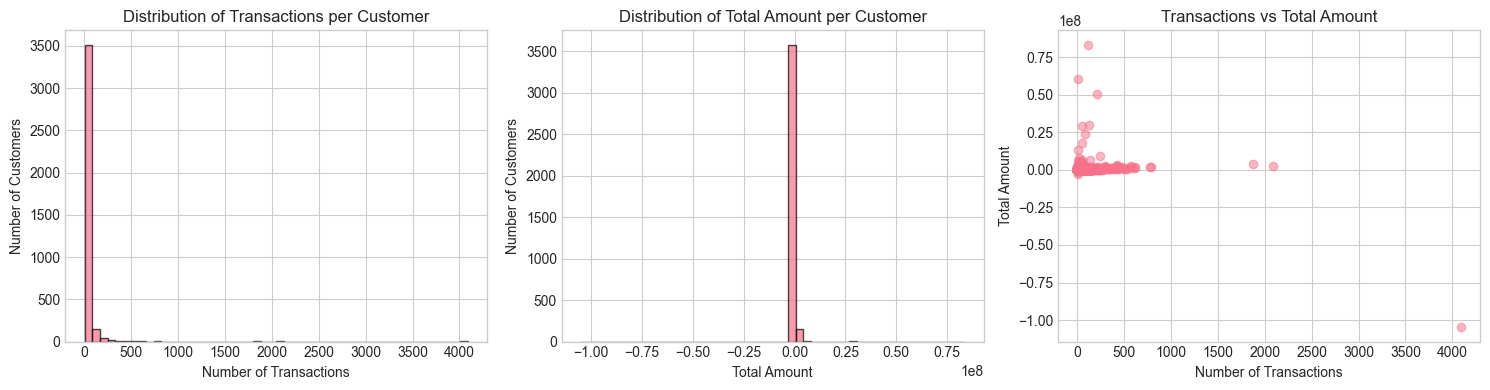

In [11]:
# Cell 11: Customer-Level Analysis
# ==============================================
print("="*50)
print("CUSTOMER-LEVEL ANALYSIS")
print("="*50)

# Group by customer if CustomerId exists
if 'CustomerId' in df.columns or 'AccountId' in df.columns:
    customer_col = 'CustomerId' if 'CustomerId' in df.columns else 'AccountId'
    
    customer_stats = df.groupby(customer_col).agg({
        'TransactionId': 'count',
        'Amount': ['sum', 'mean', 'std']
    }).round(2)
    
    customer_stats.columns = ['TransactionCount', 'TotalAmount', 'AvgAmount', 'StdAmount']
    
    print(f"\n👥 Total unique customers: {customer_stats.shape[0]}")
    print(f"💰 Total transactions analyzed: {customer_stats['TransactionCount'].sum()}")
    
    # Summary of customer behavior
    print("\n📊 Customer Behavior Summary:")
    print(customer_stats.describe().round(2))
    
    # Top customers by transactions
    print("\n🏆 Top 5 Customers by Number of Transactions:")
    display(customer_stats.sort_values('TransactionCount', ascending=False).head())
    
    # Top customers by total amount
    print("\n🏆 Top 5 Customers by Total Amount Spent:")
    display(customer_stats.sort_values('TotalAmount', ascending=False).head())
    
    # Visualize customer transaction distribution
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Transaction count distribution
    axes[0].hist(customer_stats['TransactionCount'], bins=50, edgecolor='black', alpha=0.7)
    axes[0].set_title('Distribution of Transactions per Customer', fontsize=12)
    axes[0].set_xlabel('Number of Transactions')
    axes[0].set_ylabel('Number of Customers')
    
    # Total amount distribution
    axes[1].hist(customer_stats['TotalAmount'], bins=50, edgecolor='black', alpha=0.7)
    axes[1].set_title('Distribution of Total Amount per Customer', fontsize=12)
    axes[1].set_xlabel('Total Amount')
    axes[1].set_ylabel('Number of Customers')
    
    # Scatter: Transactions vs Total Amount
    axes[2].scatter(customer_stats['TransactionCount'], customer_stats['TotalAmount'], alpha=0.5)
    axes[2].set_title('Transactions vs Total Amount', fontsize=12)
    axes[2].set_xlabel('Number of Transactions')
    axes[2].set_ylabel('Total Amount')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("⚠️ Customer identifier column not found for customer-level analysis")

OUTLIER DETECTION

💰 Amount Outlier Detection:
  Q1 (25th percentile): -50.00
  Q3 (75th percentile): 2800.00
  IQR: 2850.00
  Lower bound: -4325.00
  Upper bound: 7075.00
  Number of outliers: 24441
  Percentage of outliers: 25.55%

📋 Sample of Outliers:


,TransactionId,Amount,ProductCategory
3,TransactionId_380,20000.0,utility_bill
6,TransactionId_118063,10000.0,airtime
32,TransactionId_5351,10000.0,financial_services
39,TransactionId_104700,8000.0,financial_services
40,TransactionId_13858,8000.0,financial_services


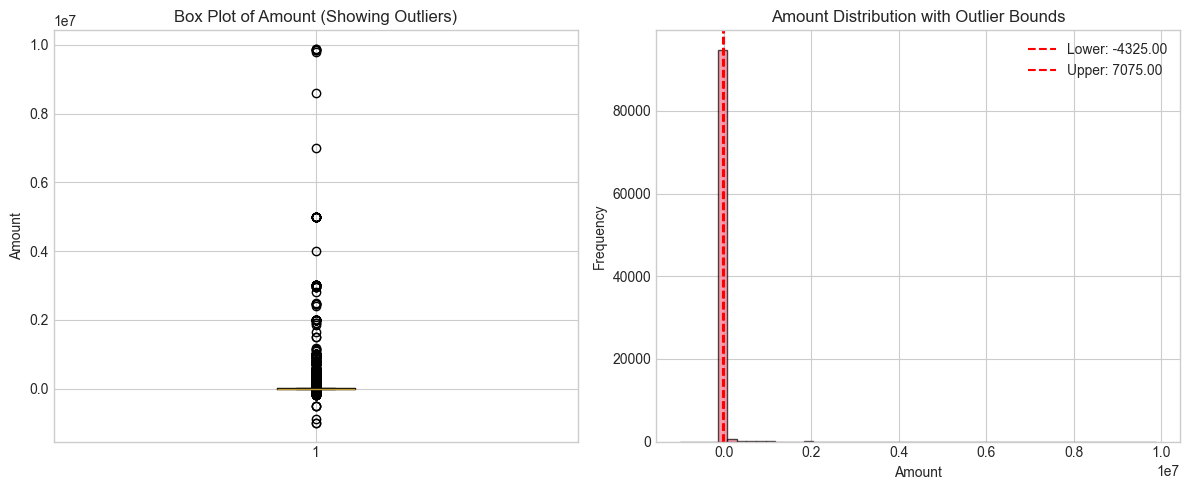

In [12]:
# Cell 12: Outlier Detection
# ==============================================
print("="*50)
print("OUTLIER DETECTION")
print("="*50)

if 'Amount' in df.columns:
    # Calculate IQR for Amount
    Q1 = df['Amount'].quantile(0.25)
    Q3 = df['Amount'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
    
    print(f"\n💰 Amount Outlier Detection:")
    print(f"  Q1 (25th percentile): {Q1:.2f}")
    print(f"  Q3 (75th percentile): {Q3:.2f}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
    
    if len(outliers) > 0:
        print("\n📋 Sample of Outliers:")
        display(outliers[['TransactionId', 'Amount', 'ProductCategory']].head())
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Box plot showing outliers
        axes[0].boxplot(df['Amount'].dropna())
        axes[0].set_title('Box Plot of Amount (Showing Outliers)', fontsize=12)
        axes[0].set_ylabel('Amount')
        
        # Histogram with outlier bounds
        axes[1].hist(df['Amount'], bins=50, edgecolor='black', alpha=0.7)
        axes[1].axvline(lower_bound, color='red', linestyle='--', label=f'Lower: {lower_bound:.2f}')
        axes[1].axvline(upper_bound, color='red', linestyle='--', label=f'Upper: {upper_bound:.2f}')
        axes[1].set_title('Amount Distribution with Outlier Bounds', fontsize=12)
        axes[1].set_xlabel('Amount')
        axes[1].set_ylabel('Frequency')
        axes[1].legend()
        
        plt.tight_layout()
        plt.show()
    else:
        print("✅ No outliers detected using IQR method")
else:
    print("⚠️ 'Amount' column not found for outlier detection")

## 📊  Top 5 EDA Insights
Based on my findings, here are my key insights:

⚠️ Extreme Transaction Distribution: 25.5% of transactions are statistical outliers (Amount > $7,075), indicating distinct customer segments (retail vs. corporate).

🎯 Fraud is Rare but Valuable: Only 0.2% fraud rate means fraud detection ≠ credit scoring. However, fraud correlates with transaction size (r=0.56), suggesting high-value transactions need extra scrutiny.

💰 Amount and Value are Nearly Identical: Correlation of 0.99 means these columns contain almost identical information. You likely only need one for modeling.

📈 Right-Skewed Transaction Values: Mean transaction ($6,717) is 6.7× larger than median ($1,000), confirming the dominance of extreme values.
🔍 CountryCode Has No Correlation: CountryCode shows NaN correlations, suggesting either data issues or that geographic location doesn't predict transaction patterns in this dataset.





